# Interactive HTML Plotting with `Plotly`
**Cole Kampa**

https://github.com/ckampa13/plotly-demo

**Disclaimer: I am not an expert and this is not an exhaustive demo. Check out documentation and Plotly/Dash gallery!**

In [1]:
from IPython.display import IFrame
IFrame(src='./bz_slice.html', width=1000, height=775)

# What is `Plotly`?

- "open-source visualization libraries for R, **Python**, and JavaScript" (https://plot.ly/)
- interactive plots
- simple API with plotly.express
- .html plots that can be served in notebooks, browsers, and embedded in web pages
- scales reasonably well with data size
    - **CAUTION**: rendering many large `Plotly` graphics in a jupyter-notebook will make the filesize too large for Github (100 MB filesize limit).
    - Can save figure to PDF and render that in Jupyter Markdown instead
- build complex pages with `Dash` by `Plotly` (https://dash-gallery.plotly.host/Portal/)

# Test Data
- Biot-Savart calculation of magnetic field in finite, large pitch solenoid

### Solenoid Primitive Calculation
![solenoid](data/sol3.gif "Title")
(source: http://hyperphysics.phy-astr.gsu.edu/hbase/magnetic/solenoid.html)

In [2]:
from scipy.constants import mu_0

In [3]:
# test data conditions
I = 6114 # current in amps
n = 10 # turns per meter

In [4]:
# field in Tesla
B_naive = mu_0 * n * I 
B_naive

0.07683078993619198

# Biot-Savart Law

$$\vec{B} (\vec{r}) = \frac{\mu_0}{4 \pi} \iiint_V \frac{(\vec{J} dV)\times \vec{r}'}{|\vec{r}'|^3} $$

- Yields exact solution
- Clearly, with a helical winding (current is **not** cylindrically symmetric), $B_z$ is not the only component.
- Also naive version ignores finite length

- From Maxwell Equations:
$$ \vec{\nabla} \cdot \vec{B} = 0$$
- Assuming field is in $\hat{z}$, and increasing as a function of $z$ (see Jackson Electrodynamics, eqn. 12.73),
$$ B_r (r, z) \approx -\frac{1}{2} r \frac{\partial B(z)}{\partial z} $$
- In finite solenoid, we have field that is mostly in $\hat{z}$, and outside the solenoid region quickly goes to $0$. So near the boundaries we expect some $B_r$ contribution.
- There may be some contribution to $B_r$ in the middle of the solenoid, due to the cylindrical asymmetry of the helical coil.

# Sample Data
- Numerical integration of a finite, helical solenoid using Biot-Savart law
- 21 x 21 x 183 grid 
- Saved in `pickle` format (smaller file, faster loading)
- **data/bfield.pkl**
- columns: $x, y, z, B_x, B_y, B_z, r, \phi, B_r, B_\phi$

## Solenoid Parameters:
$r = 250$ mm

pitch $= 100$ mm (spacing between each turn of coil)

$ L = 9.2$ m, centered at $z=0$

solenoid axis: $\hat{z}$

## Grid:
$x_0 = y_0 = -250$ mm ; $dx = dy = 25$ mm ; $x_f = y_f = 250$ mm

$z_0 = -4550$ mm ; $dz = 50$ mm ; $z_f = 4550$ mm

# Imports & Data Loading

In [5]:
import numpy as np
import pandas as pd

# PLOTLY
import plotly.express as px # method 1 (easy)
import plotly.graph_objects as go # method 2 (more involved)

In [6]:
filename = "data/bfield.pkl"
# load in pickled dataframe
df = pd.read_pickle(filename)
df.head()

x      y       z        Bx        By        Bz           r       phi  \
0 -250.0 -250.0 -4550.0  0.010224  0.007436 -0.002119  353.553391 -2.356194   
1 -250.0 -250.0 -4500.0  0.008740  0.005635 -0.003764  353.553391 -2.356194   
2 -250.0 -250.0 -4450.0  0.007490  0.004136 -0.004505  353.553391 -2.356194   
3 -250.0 -250.0 -4400.0  0.006244  0.002709 -0.004369  353.553391 -2.356194   
4 -250.0 -250.0 -4350.0  0.005509  0.001805 -0.004269  353.553391 -2.356194   

         Br      Bphi  
0  0.012642  0.628824  
1  0.010399  0.572700  
2  0.008556  0.504489  
3  0.006807  0.409298  
4  0.005797  0.316638

# Clean Data

In [7]:
len(df)

80703

In [8]:
B_naive

0.07683078993619198

In [9]:
# add a constant B field column for comparison to ideal case
df["bz_const"] = B_naive
# select only small radius (large radius has divergences at solenoid coils)
df = df[df.r < 200.]

In [10]:
len(df)

35319

In [11]:
# take one 'slice' of data (really it's a line of data)
slice_onaxis = df.query("x == 0. & y == 0.")
slice_onaxis.head()

x    y       z        Bx        By        Bz    r  phi        Br  \
40260  0.0  0.0 -4550.0  0.000278  0.000466  0.045691  0.0  0.0  0.000542   
40261  0.0  0.0 -4500.0  0.000197  0.000794  0.052397  0.0  0.0  0.000818   
40262  0.0  0.0 -4450.0  0.000117  0.000936  0.057900  0.0  0.0  0.000943   
40263  0.0  0.0 -4400.0  0.000061  0.000940  0.062159  0.0  0.0  0.000942   
40264  0.0  0.0 -4350.0  0.000027  0.000872  0.065358  0.0  0.0  0.000872   

           Bphi  bz_const  
40260  1.033046  0.076831  
40261  1.327805  0.076831  
40262  1.446330  0.076831  
40263  1.506327  0.076831  
40264  1.539535  0.076831

# Method 1: Plotly Express
- https://plot.ly/python/plotly-express/
- Intuitive API with fairly nice control, optimized for `Pandas` dataframes.

```px.PLOTTYPE(DataFrame, x=COLUMN_X, y=COLUMN_Y, color=COLUMNCOLOR, ...)```

In [12]:
fig = px.scatter(slice_onaxis, x="z", y="Bz", color="Br")

In [13]:
fig.show()

- Easy to do a simple interactive plot
- Also easy to add more complexities! For example, try the `animation_frame` parameter.

e.g.: add a marignal histogram and animate between x slices of data.

In [14]:
fig = px.scatter(df[df.y == 0.], x="z", y="Br", color="Bz",
                 marginal_y = "histogram",animation_frame="x")

In [15]:
fig.show()

_Still accomplished in a single line call to Plotly Express API!_

## 3D Plotting

What about 3D plots? We can do that too. Let's try adjusting the figure layout after the initial call. We'll give this plot a title.

In [16]:
B = "Bphi" # "Br" # "Bphi"
fig = px.scatter_3d(df, x="x", y="y", z="z", color=B)
fig.layout.title = f"Solenoid {B}"
fig.update_traces(marker=dict(size=2))
fig.layout.scene.aspectratio = {'x':.5,'y':.5,'z':1}

In [17]:
fig.show()

# Method 2: Dig in to Plotly More
- The figure reference is your friend: https://plot.ly/python/reference/

## Example: 3D Surface Plot
- Requires a 2D grid for x and y, with no repeated x,y coordinate
- z coordinate + color is defined for each x,y coordinate

In [18]:
# write a custom function!
def plotly_surf3d(df, x, y ,z, show_plot=True,
                  xrange=None, yrange=None, sliced_val=0.):
    ### FILTER DF
    coords = ["x", "y", "z"]
    # find which coordinate to slice on
    slice_coord = list(set(coords) - set([x, y]))[0]
    # make cut
    df = df[df[slice_coord] == sliced_val]
    
    # filter down DataFrame to supplied range for x and y coordinates, if xrange and yrange are supplied
    if xrange is not None:
        df = df[df[x] >= xrange[0]]
        df = df[df[x] <= xrange[1]]
    if yrange is not None:
        df = df[df[y] >= yrange[0]]
        df = df[df[y] <= yrange[1]]

    ### DF FILTERED
    
    # create a pivot from df for nicely setting up x, y, z for surface plot
    piv = df.pivot(x, y, z)
    
    # xs and ys are unique values on grid
    X = piv.index.values # pivot index/rows
    Y = piv.columns.values # pivot columns
    Z = piv.values.T # transpose of pivot values
    Xi, Yi = np.meshgrid(X, Y) # create 2d mesh from X,Y vals
    
    ### PLOTLY
    fig = go.Figure(data=
        go.Surface(
            x=Xi,
            y=Yi,
            z=Z,
            colorbar=go.surface.ColorBar(title=z,
                                         titleside='right',
                                         titlefont=dict(size=25),
                                         tickfont=dict(size=18),
                                        ),
            colorscale='Viridis',
            name="Biot-Savart"
        ))
    
    title = f"{z} vs. {x} and {y}<br>{slice_coord}=={sliced_val}"
    if xrange is not None:
        title = title + f", {xrange[0]} <= {x} <= {xrange[1]}"
    if yrange is not None:
        title = title + f", {yrange[0]} <= {y} <= {yrange[1]}"
    
    fig.layout = go.Layout(
        title = title,
        titlefont=dict(size=30),
        autosize=False,
        width=900,
        height=750,
        scene=dict(
            xaxis=dict(
                title=f'{x}',
            ),
            yaxis=dict(
                title=f'{y}',
            ),
            zaxis=dict(
                title=f'{z}',
            ),
            camera=dict(
                center=dict(
                    x=0,
                    y=0,
                    z=-0.3,
                ),
                eye=dict(
                    x=3.4496546255787175/1.6,
                    y=2.4876029142395506/1.6,
                    z=1.5875472335683052/1.6,
                )
            ),
        ),
        showlegend=True,
    )
    
    if show_plot:
        fig.show()
    
    return fig

In [19]:
fig = plotly_surf3d(df, x="y", y="z", z="Bz", show_plot=True,
                    xrange=[-150.,150.],)

# Finishing Touches
- Can still tweak figure after initial creation (with plotly.express or our custom function)

In [20]:
# create plot with custom function
fig = plotly_surf3d(df, x="y", y="z", z="Bz", show_plot=False,
                    xrange=[-200., 200.], yrange=[-2000., 2000.]);

# update axis aspect ratio to reflect grid geometry
fig.layout.scene.aspectratio = {'x':1,'y':2,'z':1}

# adjust colorbar text
fig.update_traces({"colorbar":{'title':{'font': {'size': 25}, 'side': 'right', 'text': 'Tesla'}}, 'name': "True Field"});

# save figure to pdf (static) and html (interactive)
fig.write_image("bz_slice.pdf")
fig.write_html("bz_slice.html")

In [21]:
# render interactive plot here
fig.show()

# Comparison To Naive Calculation

In [22]:
# create new figure object (surface) with constant Bz
fig_c = plotly_surf3d(df, x="y", y="z", z="bz_const", show_plot=False,
                      xrange=[-200., 200.], yrange=[-2000., 2000.])

# give unique name and color
fig_c.update_traces({"showscale":False, "colorscale":"Blues", "name":"Ampere's Law Approx."});

# add to already created figure
fig.add_traces([fig_c.data[0]]);

In [23]:
fig.show()

This plot makes clear how incorrect the constant field approximation is, even along the primary field direction.

# Error in Constant Approximation

In [24]:
df["Bz_Residual"] = df["bz_const"] - df["Bz"]

In [25]:
fig = plotly_surf3d(df, x="y", y="z", z="Bz_Residual", show_plot=False,
                    xrange=[-200.,200.], yrange=[-2000., 2000.])
fig.layout.scene.aspectratio = {'x':1,'y':2,'z':1}
fig.update_traces({"colorbar":{'title':{'font': {'size': 25}, 'side': 'right', 'text': 'Tesla'}}, 'name': "True Field"});

fig.write_image("bz_residual_slice.pdf")
fig.write_html("bz_residual_slice.html")

In [26]:
fig.show()

# Don't Overload Jupyter!

## Option 1: open plots in new tabs

In [27]:
from plotly.offline import init_notebook_mode, plot

In [28]:
plot(fig)

'temp-plot.html'

## Option 2: render static plot inline

In [29]:
from wand.image import Image as WImage # for rendering pdf in jupyter
import plotly.io as pio # for saving plots

In [30]:
def static_plot(fig, filename='temp.pdf'):
    pio.write_image(fig, filename)
    img = WImage(filename=filename)
    return img

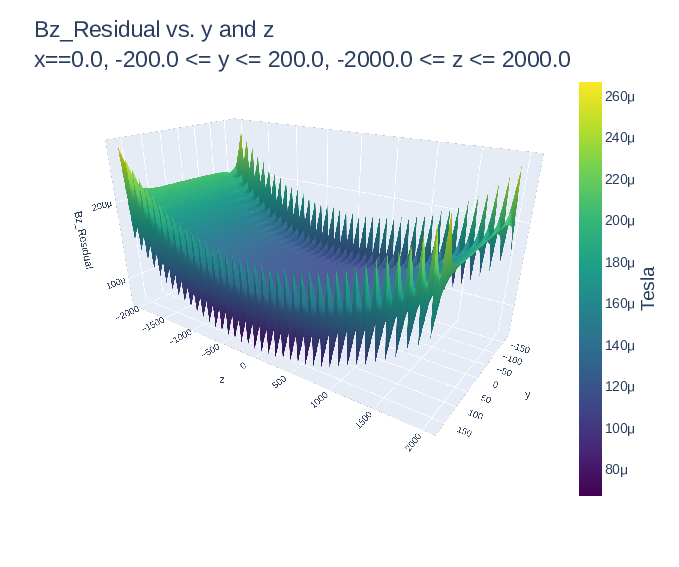

In [31]:
static_plot(fig)